# Deep Learning in Medicine
### BMSC-GA 4493, BMIN-GA 3007 
### Lab 8: GAN




### Goal of this lab: 
    - Understand GAN
    - Train GAN in the example MNIST classification problem

### Questions: 
    - What is GAN?
    - What are the different types of GANs?

In [0]:
from __future__ import print_function
import pickle 
import numpy as np
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Parameters
batch_size = 100
training_epoches = 100
lr =0.001
noise_dimension = 100

In [0]:
#torch.manual_seed(717)
use_cuda = torch.cuda.is_available()
kwargs = {}

if use_cuda:
    #torch.cuda.manual_seed(717)
    kwargs = {'num_workers': 1, 'pin_memory': True} 

   

In [0]:
# Data Loader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)

In [1]:
# Generator
class generator(nn.Module):
    # initializers
    def __init__(self, input_size=100, n_class = 28*28):
        super(generator, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(self.fc1.out_features, 512)
        self.fc3 = nn.Linear(self.fc2.out_features, 1024)
        self.fc4 = nn.Linear(self.fc3.out_features, n_class)

    # forward method
    def forward(self, input):
        x = F.leaky_relu(self.fc1(input), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.tanh(self.fc4(x))
        return x


NameError: name 'nn' is not defined

In [2]:
class discriminator(nn.Module):
    # initializers
    def __init__(self, input_size= 28*28, n_class=1):
        super(discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(self.fc1.out_features, 512)
        self.fc3 = nn.Linear(self.fc2.out_features, 256)
        self.fc4 = nn.Linear(self.fc3.out_features, n_class)

    # forward method
    def forward(self, input):
        x = F.leaky_relu(self.fc1(input), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.sigmoid(self.fc4(x))

        return x

NameError: name 'nn' is not defined

In [0]:
def show_result(num_epoch, batch_index, z, show = True, save = False, path = 'generated.png'):
    G.eval()
    test_images = G(z)
    G.train()
    
    size_figure_grid = 2
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(2, 2))
    for i in range(2):
        for j in range(1): 
            ax[i, j].get_xaxis().set_visible(False)
            ax[i, j].get_yaxis().set_visible(False)

    for k in range(4):
        i = k // 2
        j = k % 2
        ax[i, j].cla()
        ax[i, j].imshow(test_images[k, :].cpu().data.view(28, 28).numpy(), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')
    

    if show:
        plt.show()
    else:
        plt.savefig(path)
        plt.close()

In [3]:
def train(epoch):
    loss = torch.nn.BCELoss()
    D_losses =[]
    G_losses =[]
    for batch_idx, (data, _) in enumerate(train_loader):
        # Training Discriminator 
        if batch_idx % 100 ==0:
            data = data.view(-1, 28*28)
            batch_size = data.size()[0]
            data = Variable(data)
            
            #Create the real and fake target variables and the noisy input for generator
            
            # Evaluate the outputs of fake and real images using discriminator
            
            # Define real loss and fake loss for the discriminator training
            D_real_loss = None
            D_fake_loss = None
            
            
            D_train_loss = D_real_loss + D_fake_loss
            D_optimizer.zero_grad()
            D_train_loss.backward()
            D_optimizer.step()
            D_losses.append(D_train_loss.data[0])

        # Training generator 
        
        # Create target variables and the noisy input for generator
        
        # Evaluate the output of the fake images using discriminator
        
        # Define discriminator's training loss 
        
        G_optimizer.zero_grad() 
        G_train_loss.backward()
        G_optimizer.step()
        G_losses.append(G_train_loss.data[0])
        
        if batch_idx % 30 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tDiscriminator Loss: {:.6f}\tGenerator Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),D_train_loss.data[0], G_train_loss.data[0]))
            
    z= Variable(torch.randn((4, noise_dimension)))
    if use_cuda:
        z = z.cuda()
    show_result(epoch, batch_idx, z, show = True)
    return torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1168: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Train Epoch: 1 [0/60000 (0%)]	Discriminator Loss: 1.392575	Generator Loss: 0.730929
Train Epoch: 1 [3000/60000 (5%)]	Discriminator Loss: 1.392575	Generator Loss: 0.725819
Train Epoch: 1 [6000/60000 (10%)]	Discriminator Loss: 1.389959	Generator Loss: 0.736906
Train Epoch: 1 [9000/60000 (15%)]	Discriminator Loss: 1.389959	Generator Loss: 0.682080
Train Epoch: 1 [12000/60000 (20%)]	Discriminator Loss: 1.484548	Generator Loss: 0.640531
Train Epoch: 1 [15000/60000 (25%)]	Discriminator Loss: 1.540147	Generator Loss: 0.713538
Train Epoch: 1 [18000/60000 (30%)]	Discriminator Loss: 1.540147	Generator Loss: 0.649326
Train Epoch: 1 [21000/60000 (35%)]	Discriminator Loss: 1.547572	Generator Loss: 0.689514
Train Epoch: 1 [24000/60000 (40%)]	Discriminator Loss: 1.547572	Generator Loss: 0.650691
Train Epoch: 1 [27000/60000 (45%)]	Discriminator Loss: 1.530825	Generator Loss: 0.682454
Train Epoch: 1 [30000/60000 (50%)]	Discriminator Loss: 1.504109	Generator Loss: 0.731925
Train Epoch: 1 [33000/60000 (5

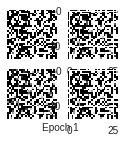

Train Epoch: 2 [0/60000 (0%)]	Discriminator Loss: 1.449642	Generator Loss: 0.737663
Train Epoch: 2 [3000/60000 (5%)]	Discriminator Loss: 1.449642	Generator Loss: 0.703386
Train Epoch: 2 [6000/60000 (10%)]	Discriminator Loss: 1.431645	Generator Loss: 0.733300
Train Epoch: 2 [9000/60000 (15%)]	Discriminator Loss: 1.431645	Generator Loss: 0.696268
Train Epoch: 2 [12000/60000 (20%)]	Discriminator Loss: 1.452936	Generator Loss: 0.716096
Train Epoch: 2 [15000/60000 (25%)]	Discriminator Loss: 1.439828	Generator Loss: 0.722807
Train Epoch: 2 [18000/60000 (30%)]	Discriminator Loss: 1.439828	Generator Loss: 0.686715
Train Epoch: 2 [21000/60000 (35%)]	Discriminator Loss: 1.464474	Generator Loss: 0.715748
Train Epoch: 2 [24000/60000 (40%)]	Discriminator Loss: 1.464474	Generator Loss: 0.705779
Train Epoch: 2 [27000/60000 (45%)]	Discriminator Loss: 1.435304	Generator Loss: 0.713826
Train Epoch: 2 [30000/60000 (50%)]	Discriminator Loss: 1.418518	Generator Loss: 0.742166
Train Epoch: 2 [33000/60000 (5

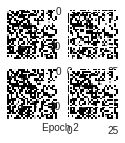

Train Epoch: 3 [0/60000 (0%)]	Discriminator Loss: 1.404059	Generator Loss: 0.742158
Train Epoch: 3 [3000/60000 (5%)]	Discriminator Loss: 1.404059	Generator Loss: 0.723933
Train Epoch: 3 [6000/60000 (10%)]	Discriminator Loss: 1.406996	Generator Loss: 0.730890
Train Epoch: 3 [9000/60000 (15%)]	Discriminator Loss: 1.406996	Generator Loss: 0.724618
Train Epoch: 3 [12000/60000 (20%)]	Discriminator Loss: 1.407310	Generator Loss: 0.726194
Train Epoch: 3 [15000/60000 (25%)]	Discriminator Loss: 1.411621	Generator Loss: 0.747265
Train Epoch: 3 [18000/60000 (30%)]	Discriminator Loss: 1.411621	Generator Loss: 0.731507
Train Epoch: 3 [21000/60000 (35%)]	Discriminator Loss: 1.411512	Generator Loss: 0.733986
Train Epoch: 3 [24000/60000 (40%)]	Discriminator Loss: 1.411512	Generator Loss: 0.722830
Train Epoch: 3 [27000/60000 (45%)]	Discriminator Loss: 1.388523	Generator Loss: 0.736874
Train Epoch: 3 [30000/60000 (50%)]	Discriminator Loss: 1.396522	Generator Loss: 0.750614
Train Epoch: 3 [33000/60000 (5

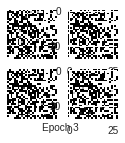

Train Epoch: 4 [0/60000 (0%)]	Discriminator Loss: 1.363702	Generator Loss: 0.768361
Train Epoch: 4 [3000/60000 (5%)]	Discriminator Loss: 1.363702	Generator Loss: 0.761596
Train Epoch: 4 [6000/60000 (10%)]	Discriminator Loss: 1.381477	Generator Loss: 0.764599
Train Epoch: 4 [9000/60000 (15%)]	Discriminator Loss: 1.381477	Generator Loss: 0.750780
Train Epoch: 4 [12000/60000 (20%)]	Discriminator Loss: 1.378536	Generator Loss: 0.756832
Train Epoch: 4 [15000/60000 (25%)]	Discriminator Loss: 1.366530	Generator Loss: 0.762463
Train Epoch: 4 [18000/60000 (30%)]	Discriminator Loss: 1.366530	Generator Loss: 0.752696


In [0]:
# Training Steps
G = generator(input_size = noise_dimension, n_class=28*28)
D = discriminator(input_size=28*28, n_class=1)
if use_cuda:
    G.cuda()
    D.cuda()
# Adam optimizer
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)

D_train_losses =[]
G_train_losses =[]


for epoch in range(1, training_epoches + 1):
    D_loss, G_loss = train(epoch)
    D_train_losses.append(D_loss)
    G_train_losses.append(G_loss)

In [0]:
# Visualize the
epoch_number = list(range(1, training_epoches + 1))
plt.plot(epoch_number,D_train_losses, 'r' )
plt.plot(epoch_number,G_train_losses, 'b' )
plt.show()